<a href="https://colab.research.google.com/github/mahenoorf/Qureca-ADEQUATE-module-exercises/blob/main/Deutsch_Jozsa_Algorithm_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Arda Çınar and Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b><font color="blue"> </font>Deutsch-Jozsa Algorithm</b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [ ]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

if in_colab():
    # url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py"
    url = "https://raw.githubusercontent.com/Razeen-ud-din/Adequate-Oracle/refs/heads/main/oracle.py"
    !wget --no-cache -O oracle.py {url}

    !pip install qiskit[visualization]
    !pip install qiskit-aer

--2025-09-07 13:32:57--  https://raw.githubusercontent.com/Razeen-ud-din/Adequate-Oracle/refs/heads/main/oracle.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3083 (3.0K) [text/plain]
Saving to: ‘oracle.py’

oracle.py           100%[===================>]   3.01K  --.-KB/s    in 0s      

2025-09-07 13:32:57 (36.0 MB/s) - ‘oracle.py’ saved [3083/3083]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10

<a name="task3"></a>
### Task 3 (Discussion)

- How many times do we need to use the oracle f, if we want to solve this problem clasically, in the worst case?

- How many times do you think we will use the oracle f while solving it with a quantum computer?

<h3>Solution</h3>

- We need to make at least $\frac{2^n}{2} + 1$ queries in the worst case to make sure that the function is etiher balanced or constant.

<a name="task4"></a>
### Task 4

You are given an oracle function called `oraclej(n)`, which returns a random quantum circuit with `n+1` qubits corresponding to a constant or even fuction. `oraclej(n)` represents the $U_f$ in our algorithm.

Let $n=4$. Implement the proposed algorithm to decide whether or not $f$ is constant or balanced. Note that qubit 4 is the output qubit.

(Note: You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit?)

Don't forget to run the following cell to load the oracle function.


In [ ]:
quantum_file = path_files+"oracle.py"
%run $quantum_file

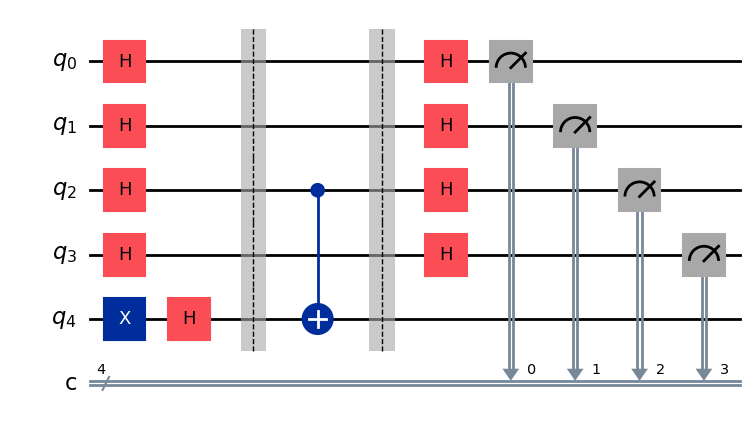

In [ ]:
import random
# from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer #for qiskit version 1.x
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit #for qiskit version 2.x
from qiskit_aer import Aer #for qiskit version 2.x

dj_circuit = QuantumCircuit(5, 4)

dj_circuit.x(4)

dj_circuit.h(range(5))

dj_circuit.compose(oraclej(4), inplace=True)

dj_circuit.h(range(4))
dj_circuit.measure(range(4), range(4))
dj_circuit.draw(output='mpl')

In [ ]:
# job = execute(dj_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(dj_circuit,shots=10000)
counts = job.result().get_counts()
print(counts)

{'0100': 10000}


<a name="task5"></a>
### Task 5

Write two functions `balanced(n)` and `constant(n)` to randomly generate quantum circuits with $n+1$ qubits that implement a function $ f : \{0, 1\}^n \rightarrow \{0, 1\} $ such that $f$ is either constant or balanced.

Note that qubit $n$ is the output qubit.

In [ ]:
import random
# from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer #for qiskit version 1.x
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit #for qiskit version 2.x
from qiskit_aer import Aer #for qiskit version 2.x

#f(x)=0 if first qubit is 0, if x_1=0
#f(x)=1 if first qubit is 1, if x_1=1
def balanced(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()

    circuit.cx(0,n)

    circuit.barrier()
    return circuit

#f(x)=0
def constant(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()

    #do nothing

    circuit.barrier()
    return circuit

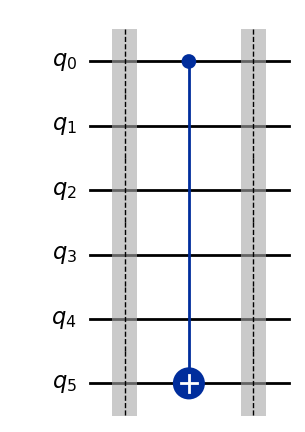

In [ ]:
n=5
balanced(n).draw(output='mpl')

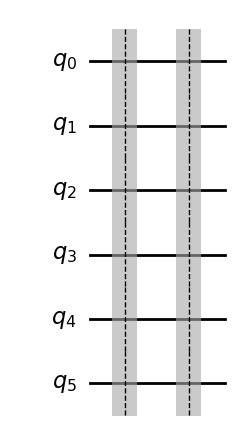

In [ ]:
n=5
constant(n).draw(output='mpl')